In [ ]:
#Red Neuronal Convolucional aplicadas en

import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive
from google.colab import files
import os

# Crear un directorio para almacenar las imágenes
os.makedirs('images', exist_ok=True)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Número de imágenes encontradas: 0


IndexError: list index out of range

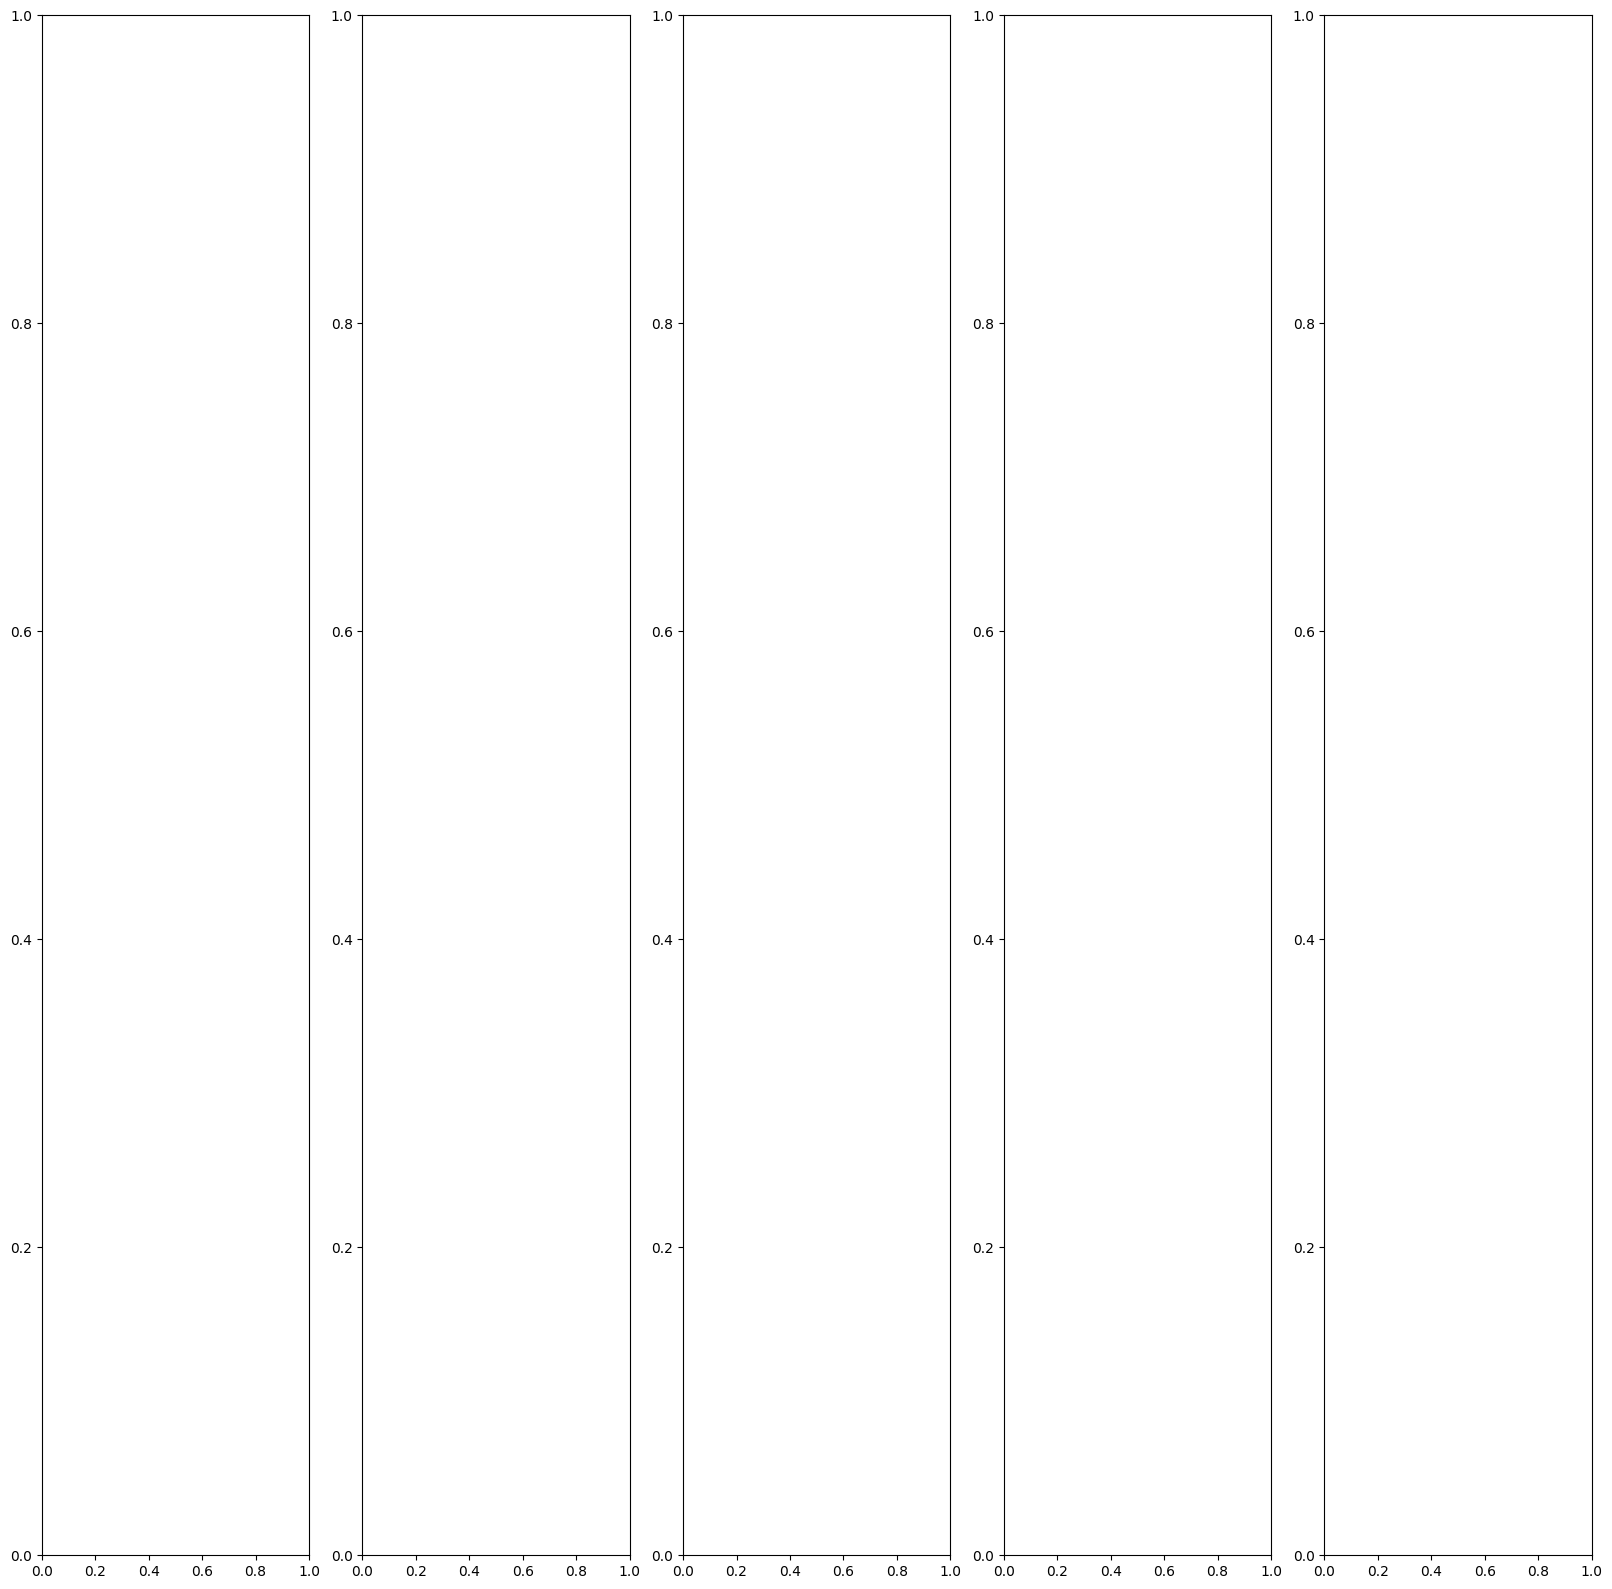

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os

# Especificar el directorio que contiene las imágenes
image_dir = 'images'

# Listar los archivos en el directorio
images = os.listdir(image_dir)
print(f'Número de imágenes encontradas: {len(images)}')

# Mostrar algunas imágenes para verificar
fig, axes = plt.subplots(1, 5, figsize=(20, 20))
for i in range(5):
    img_path = os.path.join(image_dir, images[i])
    img = mpimg.imread(img_path)
    axes[i].imshow(img)
    axes[i].set_title(images[i])
    axes[i].axis('off')
plt.show()

      filename                     label
0  Image_1.jpg          SOUTHERN DOGFACE
1  Image_2.jpg                    ADONIS
2  Image_3.jpg            BROWN SIPROETA
3  Image_4.jpg                   MONARCH
4  Image_5.jpg  GREEN CELLED CATTLEHEART
Número de imágenes encontradas: 1772
Tamaño del array de imágenes: (1772, 32, 32, 3)
Tamaño del array de etiquetas: (1772,)
Número de clases: 75
Clases únicas: ['ADONIS' 'AFRICAN GIANT SWALLOWTAIL' 'AMERICAN SNOOT' 'AN 88' 'APPOLLO'
 'ATALA' 'BANDED ORANGE HELICONIAN' 'BANDED PEACOCK' 'BECKERS WHITE'
 'BLACK HAIRSTREAK' 'BLUE MORPHO' 'BLUE SPOTTED CROW' 'BROWN SIPROETA'
 'CABBAGE WHITE' 'CAIRNS BIRDWING' 'CHECQUERED SKIPPER' 'CHESTNUT'
 'CLEOPATRA' 'CLODIUS PARNASSIAN' 'CLOUDED SULPHUR' 'COMMON BANDED AWL'
 'COMMON WOOD-NYMPH' 'COPPER TAIL' 'CRECENT' 'CRIMSON PATCH'
 'DANAID EGGFLY' 'EASTERN COMA' 'EASTERN DAPPLE WHITE'
 'EASTERN PINE ELFIN' 'ELBOWED PIERROT' 'GOLD BANDED' 'GREAT EGGFLY'
 'GREAT JAY' 'GREEN CELLED CATTLEHEART' 'GREY HAIRSTREAK'

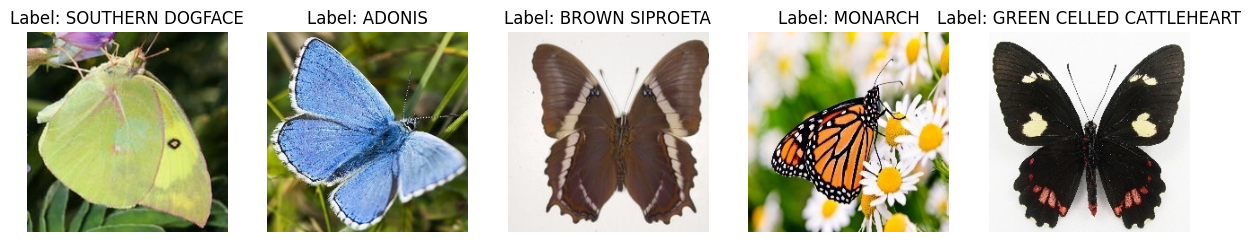

Dimensiones de una imagen en el dataset: (32, 32, 3)
Etiqueta correspondiente: b'SOUTHERN DOGFACE'


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

# Tamaño de las imágenes (ajustar según sea necesario)
img_size = (32, 32)

# Función para leer y procesar una imagen
def load_and_preprocess_image(image_path, img_size):
    img = load_img(image_path, target_size=img_size)
    img_array = img_to_array(img)
    #print(f"Valores antes de normalizar: {img_array.min()} - {img_array.max()}")
    #img_array = img_array / 255.0  # Normalizar las imágenes
    #print(f"Valores después de normalizar: {img_array.min()} - {img_array.max()}")
    return img_array

# Especificar el directorio que contiene las imágenes
image_dir = 'images'

# Leer el archivo CSV con pandas
labels_df = pd.read_csv('Training_set_1.csv')

# Verificar las primeras filas del DataFrame para asegurarse de que se ha cargado correctamente
print(labels_df.head())

# Filtrar solo archivos de imagen que están presentes en el CSV
image_files = labels_df['filename'].tolist()
labels = labels_df['label'].tolist()

print(f'Número de imágenes encontradas: {len(image_files)}')

# Procesar todas las imágenes en el directorio
image_data = []
for img_file in image_files:
    img_path = os.path.join(image_dir, img_file)
    img_array = load_and_preprocess_image(img_path, img_size)
    image_data.append(img_array)
    #image_data.append(img_path)

# Convertir la lista de imágenes a un array de NumPy
image_data = np.array(image_data)
labels = np.array(labels)
print(f'Tamaño del array de imágenes: {image_data.shape}')
print(f'Tamaño del array de etiquetas: {labels.shape}')

# Encontrar las clases únicas en las etiquetas
unique_classes = np.unique(labels)

# Contar el número de clases
num_classes = len(unique_classes)

print(f'Número de clases: {num_classes}')
print(f'Clases únicas: {unique_classes}')

# Convertir image_data y labels en un dataset de TensorFlow
image_dataset = tf.data.Dataset.from_tensor_slices((image_data, labels))

# Mostrar algunas imágenes para verificar
fig, axes = plt.subplots(1, 5, figsize=(15, 3))
for i in range(5):
    img_path = os.path.join(image_dir, image_files[i])
    img = plt.imread(img_path)
    axes[i].imshow(img)
    axes[i].set_title(f"Label: {labels[i]}")
    axes[i].axis('off')
plt.show()

# Verificar las dimensiones de los datos
for image, label in image_dataset.take(1):
    print("Dimensiones de una imagen en el dataset:", image.shape)
    print("Etiqueta correspondiente:", label.numpy())

# Sección nueva

In [ ]:
print("Imágenes como array:", image_data.shape)
print("Etiquetas como array:", labels.shape)

Imágenes como array: (1772, 32, 32, 3)
Etiquetas como array: (1772,)


Tipo de datos de img_to_show: float32
Rango de valores de img_to_show: 0.0 - 244.0


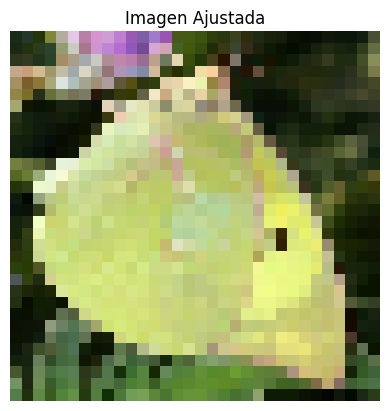

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Supongamos que img_to_show es tu imagen a mostrar
img_to_show = image_data[0]  # Ejemplo: primera imagen en el conjunto de datos

# Verifica el tipo de datos y el rango
print(f"Tipo de datos de img_to_show: {img_to_show.dtype}")
print(f"Rango de valores de img_to_show: {img_to_show.min()} - {img_to_show.max()}")

# Ajusta los valores si es necesario
if img_to_show.max() > 1.0:
    img_to_show = img_to_show / 244.0  # Normaliza a [0, 1]
elif img_to_show.max() <= 1.0:
    img_to_show = img_to_show  # Ya está en el rango adecuado

# Convertir a uint8 para la visualización
img_to_show = np.clip(img_to_show, 0, 1)  # Asegúrate de que los valores estén en [0, 1]
img_to_show = (img_to_show * 255).astype(np.uint8)  # Convertir a uint8

# Si la imagen es en escala de grises, conviértela a RGB
if img_to_show.ndim == 2:  # Escala de grises
    img_to_show = np.stack([img_to_show] * 3, axis=-1)  # Convertir a RGB

# Muestra la imagen
plt.imshow(img_to_show)
plt.title('Imagen Ajustada')
plt.axis('off')
plt.show()

In [ ]:
import numpy as np
from sklearn.preprocessing import LabelEncoder

# 1. Normalizar las imágenes (escala de 0 a 1)
images_array = images_array.astype(np.float32) / 255.0

print("Imágenes normalizadas, forma del array:", images_array.shape)

# 2. Convertir etiquetas de texto a valores numéricos
# Asegúrate de que labels_array contiene etiquetas de texto
labels_array = np.array(labels_list)  # Si ya está como texto, conviértelo a una lista de strings si es necesario

# Crear un LabelEncoder y ajustar a las etiquetas
label_encoder = LabelEncoder()
labels_int = label_encoder.fit_transform(labels_array.flatten())  # Aplanar para ajustar el encoder

# Convertir a array numpy
labels_int = np.array(labels_int)

# Asegúrate de que las dimensiones coincidan con las imágenes
print("Etiquetas como array:", labels_int.shape)



Imágenes normalizadas, forma del array: (1772, 32, 32, 3)
Etiquetas como array: (1772,)


In [ ]:
# Dividir los datos en conjuntos de entrenamiento y prueba si es necesario
from sklearn.model_selection import train_test_split

# Dividir las imágenes y etiquetas en conjuntos de entrenamiento y prueba
train_images, test_images, train_labels, test_labels = train_test_split(
    images_array, labels_int, test_size=0.2, random_state=42
)

print("Forma de las imágenes de entrenamiento:", train_images.shape)
print("Forma de las etiquetas de entrenamiento:", train_labels.shape)
print("Forma de las imágenes de prueba:", test_images.shape)
print("Forma de las etiquetas de prueba:", test_labels.shape)

Forma de las imágenes de entrenamiento: (1417, 32, 32, 3)
Forma de las etiquetas de entrenamiento: (1417,)
Forma de las imágenes de prueba: (355, 32, 32, 3)
Forma de las etiquetas de prueba: (355,)


Rango de valores de la imagen: 0 - 0
Dimensiones de la imagen: (32, 32, 3)
Dimensiones de la imagen de prueba: (224, 224, 3)
Rango de valores de la imagen de prueba: 0 - 255


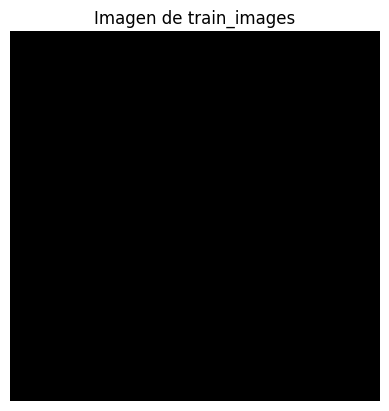

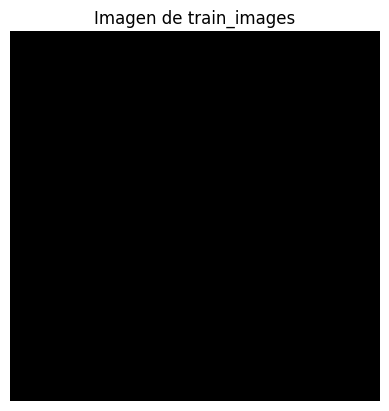

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os

# Supongamos que train_images es un array de NumPy con las imágenes cargadas y procesadas
# Aquí solo mostramos la primera imagen como ejemplo

print(f"Rango de valores de la imagen: {img_to_show.min()} - {img_to_show.max()}")
if img_to_show.size == 0:
    print("La imagen está vacía.")
print(f"Dimensiones de la imagen: {img_to_show.shape}")


# Verifica si los archivos de imagen realmente existen
for img_file in image_files:
    img_path = os.path.join(image_dir, img_file)
    if not os.path.exists(img_path):
        print(f"Archivo no encontrado: {img_path}")

def load_and_preprocess_image(image_path, img_size):
    img = load_img(image_path, target_size=img_size)
    img_array = img_to_array(img)
    print(f"Valores antes de normalizar: {img_array.min()} - {img_array.max()}")
    img_array = img_array / 255.0  # Normalizar las imágenes
    print(f"Valores después de normalizar: {img_array.min()} - {img_array.max()}")
    return img_array

# Prueba abrir una imagen y verificar su contenido
test_image_path = os.path.join(image_dir, image_files[0])
test_img = cv2.imread(test_image_path)
print(f"Dimensiones de la imagen de prueba: {test_img.shape}")
print(f"Rango de valores de la imagen de prueba: {test_img.min()} - {test_img.max()}")

if len(train_images) > 0:
    img_to_show = train_images[0]

    # Asegúrate de que los valores estén en el rango [0, 255] para visualización
    if img_to_show.max() <= 1.0:
        img_to_show = (img_to_show * 255).astype(np.uint8)

    # Mostrar la imagen
    plt.imshow(img_to_show)
    plt.title('Imagen de train_images')
    plt.axis('off')  # No mostrar ejes
    plt.show()
else:
    print("No hay imágenes en train_images para mostrar.")


# Asegúrate de que train_images tenga al menos una imagen
if len(train_images) > 0:
    # Selecciona la primera imagen para mostrar
    img_to_show = train_images[0]

    # Verifica si la imagen está en un rango diferente
    if img_to_show.max() <= 1.0:
        img_to_show = (img_to_show * 255).astype(np.uint8)

    # Si la imagen tiene un canal de color, conviértela a RGB
    if img_to_show.ndim == 3 and img_to_show.shape[-1] == 1:  # Imagen en escala de grises
        img_to_show = img_to_show.squeeze(axis=-1)  # Elimina el canal de color

    # Si la imagen tiene un canal de color (por ejemplo, RGB), invierte el orden de los canales si es necesario
    if img_to_show.ndim == 3 and img_to_show.shape[-1] == 3:
        img_to_show = img_to_show[..., ::-1]  # Convierte BGR a RGB si es necesario (OpenCV usa BGR por defecto)

    # Mostrar la imagen
    plt.imshow(img_to_show, cmap='gray' if img_to_show.ndim == 2 else None)
    plt.title('Imagen de train_images')
    plt.axis('off')  # No mostrar ejes
    plt.show()
else:
    print("No hay imágenes en train_images para mostrar.")

In [ ]:
#Construcción del modelo
#Construir el modelo de clasificación
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from keras.models import Sequential

# Definir un modelo simple como ejemplo
# Definir el modelo con el número correcto de clases
# Definir el modelo
model = keras.Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(num_classes, activation='softmax')])

model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_17 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_14 (MaxPooli  (None, 15, 15, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_18 (Conv2D)          (None, 13, 13, 64)        18496     
                                                                 
 flatten_8 (Flatten)         (None, 10816)             0         
                                                                 
 dense_14 (Dense)            (None, 64)                692288    
                                                                 
 dense_15 (Dense)            (None, 75)                4875      
                                                      

In [ ]:
#Compilar el modelo
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Epoch 1/10
45/45 [==============================] - 6s 99ms/step - loss: 4.3181 - accuracy: 0.0071 - val_loss: 4.3164 - val_accuracy: 0.0310
Epoch 2/10
45/45 [==============================] - 2s 42ms/step - loss: 4.3145 - accuracy: 0.0148 - val_loss: 4.3137 - val_accuracy: 0.0113
Epoch 3/10
45/45 [==============================] - 2s 42ms/step - loss: 4.3104 - accuracy: 0.0155 - val_loss: 4.3131 - val_accuracy: 0.0141
Epoch 4/10
45/45 [==============================] - 2s 42ms/step - loss: 4.3050 - accuracy: 0.0191 - val_loss: 4.3165 - val_accuracy: 0.0085
Epoch 5/10
45/45 [==============================] - 2s 50ms/step - loss: 4.3038 - accuracy: 0.0176 - val_loss: 4.3157 - val_accuracy: 0.0085
Epoch 6/10
45/45 [==============================] - 3s 75ms/step - loss: 4.3009 - accuracy: 0.0219 - val_loss: 4.3150 - val_accuracy: 0.0085
Epoch 7/10
45/45 [==============================] - 2s 46ms/step - loss: 4.2997 - accuracy: 0.0219 - val_loss: 4.3143 - val_accuracy: 0.0085
Epoch 8/10
45

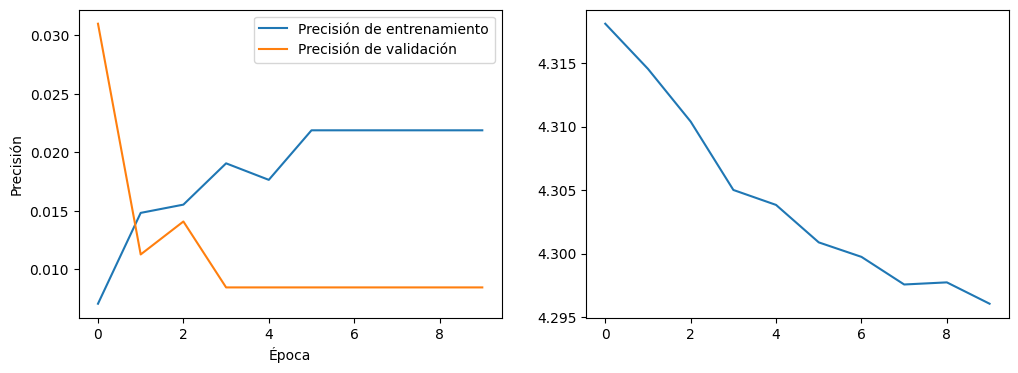

In [ ]:
# Entrenar el modelo
history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels),
                    batch_size=32)

# Graficar el historial de entrenamiento
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))

# Gráfico de precisión
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Precisión de entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión de validación')
plt.xlabel('Época')
plt.ylabel('Precisión')
plt.legend()

# Gráfico de pérdida
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Pérdida de entrenamiento')

In [ ]:
#Evaluar el modelo en el conjunto de entrenamiento
loss, accuracy = model.evaluate(train_images, train_labels)
print("Pérdida en el conjunto de entrenamiento:", loss)
print("Precisión en el conjunto de entrenamiento:", accuracy)

#Evaluar el modelo con datos no vistos
loss, accuracy = model.evaluate(test_images, test_labels)
print("Pérdida en el conjunto de prueba:", loss)
print("Precisión en el conjunto de prueba:", accuracy)


45/45 [==============================] - 1s 21ms/step - loss: 4.2928 - accuracy: 0.0219
Pérdida en el conjunto de entrenamiento: 4.292805194854736
Precisión en el conjunto de entrenamiento: 0.02187720499932766
12/12 [==============================] - 0s 20ms/step - loss: 4.3193 - accuracy: 0.0085
Pérdida en el conjunto de prueba: 4.3193464279174805
Precisión en el conjunto de prueba: 0.008450704626739025


In [ ]:
#Predicción
index = 1
print(f'Label: {test_labels[index]}')
classification = model.predict(test_images[index:index+1])
print(f'Classification:\n {classification.reshape(-1,1)}')
#plt.imshow(test_images[index])
#plt.show()

Label: 26
1/1 [==============================] - 0s 109ms/step
Classification:
 [[0.01308544]
 [0.01003816]
 [0.01373482]
 [0.01536621]
 [0.00840257]
 [0.01671646]
 [0.01424832]
 [0.01696153]
 [0.01302869]
 [0.01711973]
 [0.00821828]
 [0.0117203 ]
 [0.01670195]
 [0.01536864]
 [0.00950765]
 [0.01072611]
 [0.01426978]
 [0.0084376 ]
 [0.01715307]
 [0.01146315]
 [0.01334911]
 [0.01482781]
 [0.01546261]
 [0.01679466]
 [0.00994818]
 [0.01584312]
 [0.01673003]
 [0.01281342]
 [0.01131721]
 [0.01293581]
 [0.01050147]
 [0.0106963 ]
 [0.01288707]
 [0.01816976]
 [0.0118967 ]
 [0.01509566]
 [0.01281997]
 [0.01398854]
 [0.01542118]
 [0.01103058]
 [0.01173295]
 [0.01586026]
 [0.01460036]
 [0.01441459]
 [0.01180863]
 [0.01843981]
 [0.01332686]
 [0.01619114]
 [0.01362304]
 [0.01083972]
 [0.01178289]
 [0.01267702]
 [0.01312711]
 [0.00950093]
 [0.01179502]
 [0.01518053]
 [0.01652794]
 [0.0095472 ]
 [0.00916757]
 [0.0143408 ]
 [0.01400007]
 [0.01353962]
 [0.01481083]
 [0.01172342]
 [0.02152294]
 [0.012916

In [ ]:
#Después de realizar el entrenamiento vamos a ejecutar un código que permite
#Visualizar las convoluciones y Pooling

#Preparación de los datos
print(test_labels[:30])

[74 26  6 10 70 25 28 53  9 48 43 36 19 27 55  9 50 33 33  4 12 46 18 59
 20 27 44 16 41 21]


In [ ]:
#Selección de imágenes de interés

FIRST_IMAGE=74
SECOND_IMAGE=26
THIRD_IMAGE=10

print(f'Label: {test_labels[FIRST_IMAGE]}')
print(f'Label: {test_labels[SECOND_IMAGE]}')
print(f'Label: {test_labels[THIRD_IMAGE]}')

Label: 21
Label: 44
Label: 43


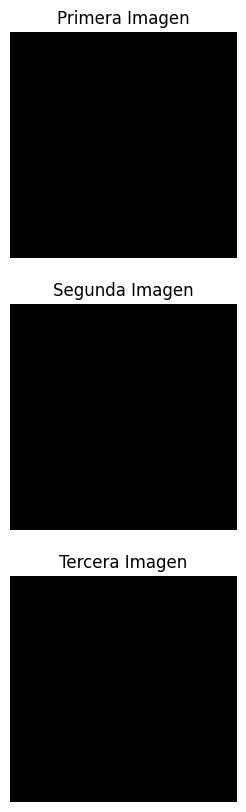

In [ ]:
import matplotlib.pyplot as plt

# Definir los índices de las imágenes que se van a mostrar
FIRST_IMAGE = 74
SECOND_IMAGE = 26
THIRD_IMAGE = 10

# Visualización de imágenes
f, axarr = plt.subplots(3, 1, figsize=(10, 10))

# Mostrar la primera imagen
axarr[0].imshow(test_images[FIRST_IMAGE])
axarr[0].set_title('Primera Imagen')

# Mostrar la segunda imagen
axarr[1].imshow(test_images[SECOND_IMAGE])
axarr[1].set_title('Segunda Imagen')

# Mostrar la tercera imagen
axarr[2].imshow(test_images[THIRD_IMAGE])
axarr[2].set_title('Tercera Imagen')

# Quitar los ejes para una mejor visualización
for ax in axarr:
    ax.axis('off')

plt.show()


In [ ]:
#Extracción de activaciones

layer = 0
filter1 = 0
filter2 = 10

layer_outputs = [layer.output for layer in model.layers]
activation_model = keras.models.Model(inputs=model.input, outputs=layer_outputs)



1/1 [==============================] - 0s 194ms/step
Shape of activation 0: (1, 30, 30, 32)
Shape of activation 1: (1, 15, 15, 32)
Shape of activation 2: (1, 13, 13, 64)
Shape of activation 3: (1, 10816)
Shape of activation 4: (1, 64)
Shape of activation 5: (1, 75)


<ipython-input-104-e19117b78f30>:27: RuntimeWarning: divide by zero encountered in divide
  f1 = (f1 - f1.mean()) / f1.std()
<ipython-input-104-e19117b78f30>:27: RuntimeWarning: invalid value encountered in divide
  f1 = (f1 - f1.mean()) / f1.std()


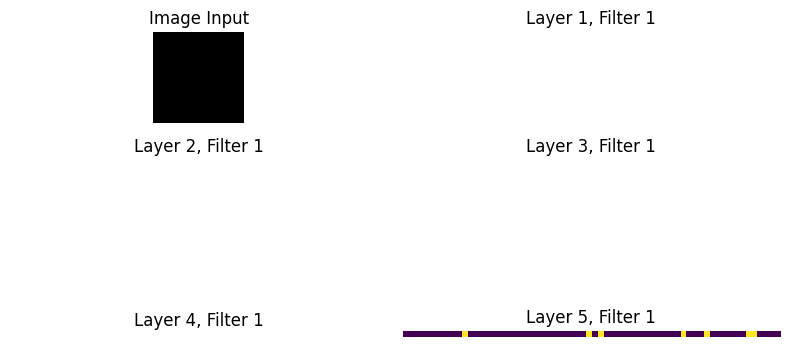

In [ ]:
# Mostrar las activaciones para la primera imagen del conjunto de prueba
FIRST_IMAGE = 0
test_image = test_images[FIRST_IMAGE].reshape(1, 32, 32, 3)  # Ajustar el tamaño correctamente
activations = activation_model.predict(test_image)

# Imprimir las formas de las activaciones para depuración
for i, activation in enumerate(activations):
    print(f"Shape of activation {i}: {activation.shape}")

# Graficar las activaciones
fig, axarr = plt.subplots(3, 2, figsize=(8, 4))
axarr[0, 0].set_title('Image Input')
axarr[0, 0].imshow(test_images[FIRST_IMAGE])
axarr[0, 0].axis('off')

# Ocultar el subplot extra
axarr[0, 1].axis('off')

for i in range(1, 6):
    # Tomar el primer filtro de la capa
    if len(activations[i-1].shape) == 4:
        f1 = activations[i-1][0, :, :, 0]
    else:
        f1 = activations[i-1]

    # Normalizar las activaciones para mejor visualización
    f1 = (f1 - f1.mean()) / f1.std()
    f1 = np.clip(f1, 0, 1)

    # Ajustar el índice de subplot
    row = (i) // 2
    col = (i) % 2

    axarr[row, col].set_title(f'Layer {i}, Filter 1')
    axarr[row, col].imshow(f1, cmap='viridis')
    axarr[row, col].axis('off')

# Ajustar el layout
plt.tight_layout()
plt.show()
